<a href="https://colab.research.google.com/github/Neilcox58/Data-Mining/blob/main/PCA_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimension Reduction**

---

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import skew, zscore



##Dimension Reduction for Categorical Variables

In [17]:
# Load the Boston Housing dataset
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing (2).csv


In [18]:
# Check uploaded file names
import io

# Get the filename automatically from uploaded
filename = next(iter(uploaded))
print("Loaded:", filename)

# Read the CSV into a DataFrame
data = pd.read_csv(io.BytesIO(uploaded[filename]))
data.head()

Loaded: BostonHousing (2).csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [19]:
# Generate the crosstab (frequency table)
ct = pd.crosstab(data['CAT.MEDV'], data['ZN'], normalize = 'columns')

# Round for readability
ct = ct.round(2)
print(ct.T)

CAT.MEDV     0     1
ZN                  
0.0       0.91  0.09
12.5      1.00  0.00
17.5      0.00  1.00
18.0      1.00  0.00
20.0      0.24  0.76
21.0      1.00  0.00
22.0      0.90  0.10
25.0      1.00  0.00
28.0      1.00  0.00
30.0      1.00  0.00
33.0      0.50  0.50
34.0      0.67  0.33
35.0      0.67  0.33
40.0      0.43  0.57
45.0      0.17  0.83
52.5      1.00  0.00
55.0      0.67  0.33
60.0      0.75  0.25
70.0      1.00  0.00
75.0      0.33  0.67
80.0      0.67  0.33
82.5      0.50  0.50
85.0      1.00  0.00
90.0      0.00  1.00
95.0      0.00  1.00
100.0     0.00  1.00


In [22]:
# Create ZN_combined by remapping values
data['ZN_combined'] = data['ZN'].copy()

# Remap specified values
data['ZN_combined'] = data['ZN_combined'].replace([90.0, 95.0, 100.0], 17.5)
data['ZN_combined'] = data['ZN_combined'].replace([18.0, 21.0, 25.0, 28.0, 30.0, 52.5, 70.0, 85.0], 12.5)

# Generate the crosstab (frequency table) using the new 'ZN_combined' column
ct = pd.crosstab(data['CAT.MEDV'], data['ZN_combined'], normalize = 'columns')

# Round for readability
ct = ct.round(2)
print(ct.T)

CAT.MEDV        0     1
ZN_combined            
0.0          0.91  0.09
12.5         1.00  0.00
17.5         0.00  1.00
20.0         0.24  0.76
22.0         0.90  0.10
33.0         0.50  0.50
34.0         0.67  0.33
35.0         0.67  0.33
40.0         0.43  0.57
45.0         0.17  0.83
55.0         0.67  0.33
60.0         0.75  0.25
75.0         0.33  0.67
80.0         0.67  0.33
82.5         0.50  0.50


## Dimension Reduction for Numeric Variables


In [23]:
# Load the California Housing dataset
from google.colab import files
uploaded = files.upload()

# Check uploaded file names
import io

# Get the filename automatically from uploaded
filename = next(iter(uploaded))
print("Loaded:", filename)

# Read the CSV into a DataFrame
data = pd.read_csv(io.BytesIO(uploaded[filename]))
data.head()

Saving CaliforniaHousing.csv to CaliforniaHousing (2).csv
Loaded: CaliforniaHousing (2).csv


,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,median_house_value
0,8.3,41,880,129,322,126,37.9,-122,453000
1,8.3,21,7100,1110,2400,1140,37.9,-122,359000
2,7.3,52,1470,190,496,177,37.9,-122,352000
3,5.6,52,1270,235,558,219,37.9,-122,341000
4,3.9,52,1630,280,565,259,37.9,-122,342000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

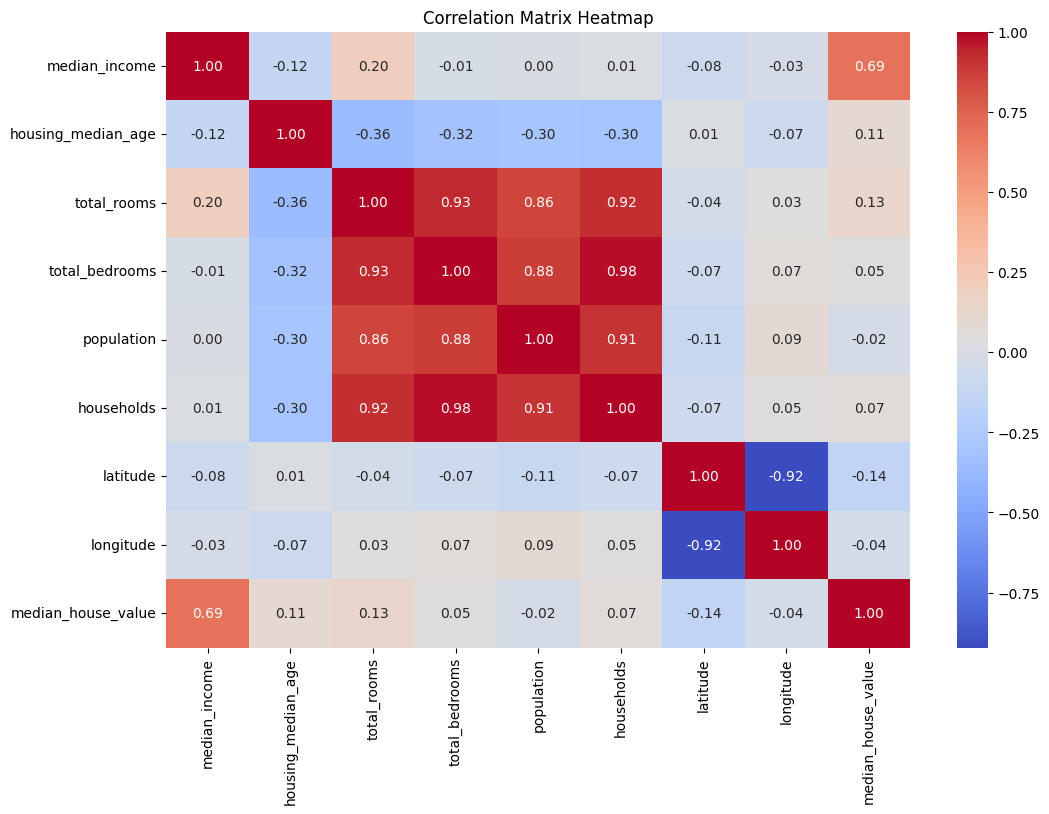

In [25]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt = ".2f")
plt.title('Correlation Matrix Heatmap')


In [27]:
# Calculate standard deviation for each column
std_dev = data.std(numeric_only = True)
std_dev

,0
median_income,1.899954
housing_median_age,12.585558
total_rooms,2181.714461
total_bedrooms,421.373725
population,1132.718021
households,382.424447
latitude,2.136949
longitude,2.019509
median_house_value,115396.319224


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for PCA and drop 'median_house_value'
numeric_data = data.select_dtypes(include=np.number).drop(columns=['median_house_value'])

# Standardize the features
scaled_data = StandardScaler().fit_transform(numeric_data)

# Apply PCA
pca = PCA().fit(scaled_data)

# Create summary DataFrame with principal component labels
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': pca.explained_variance_ratio_.cumsum()
})

pca_summary

,Principal Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.487997,0.487997
1,PC2,0.238205,0.726202
2,PC3,0.134322,0.860524
3,PC4,0.102349,0.962872
4,PC5,0.018581,0.981453
5,PC6,0.010245,0.991697
6,PC7,0.006457,0.998155
7,PC8,0.001845,1.000000


In [30]:
# component matrix
component_matrix = pd.DataFrame(pca.components_, columns=numeric_data.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
component_matrix

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
PC1,0.044849,-0.217812,0.484141,0.490986,0.472281,0.492232,-0.070877,0.068715
PC2,-0.024429,-0.003449,0.072202,0.053503,0.020252,0.056183,0.703130,-0.702393
PC3,0.890800,-0.394358,0.091006,-0.118318,-0.115740,-0.110458,-0.013047,-0.053936
PC4,0.407721,0.888949,0.117274,0.063888,0.081919,0.097040,-0.073261,-0.064836
PC5,0.052952,-0.032633,-0.318083,-0.376092,0.846277,-0.136620,-0.068535,-0.118161
PC6,-0.038214,0.073785,0.506779,-0.220931,0.148254,-0.383424,0.503941,0.514306
PC7,-0.177810,-0.015985,0.596793,-0.228676,-0.024208,-0.331794,-0.484903,-0.462459
PC8,0.041836,0.005750,-0.155549,0.703876,0.132980,-0.676141,-0.035530,-0.049673


In [32]:
# Get the eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_
eigenvalues


array([3.90416304, 1.90573254, 1.07462805, 0.81882778, 0.14865126,
       0.08196074, 0.05166076, 0.01476345])

/tmp/ipython-input-4209605381.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


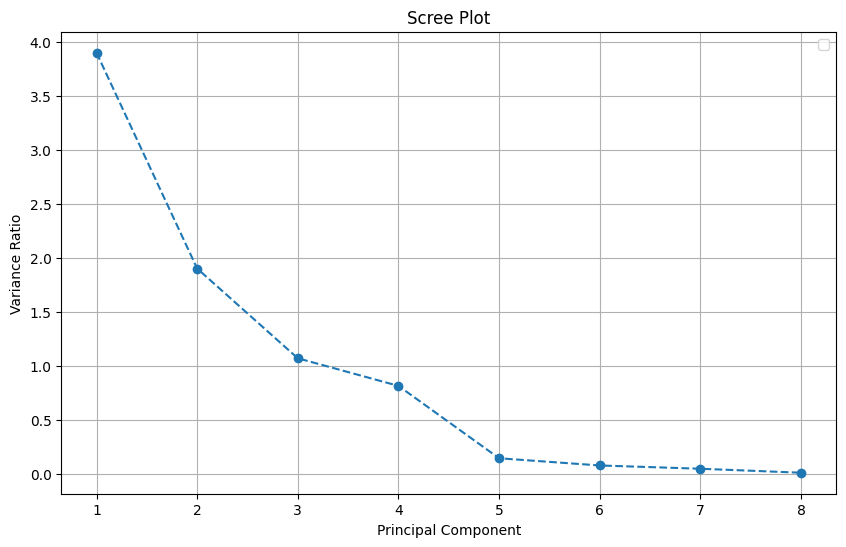

In [34]:
# Generate a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
# After running PCA replace original data with principal components
principal_components = pca.transform(scaled_data)

# Convert to DataFrame
new_dataset = pd.DataFrame( principal_components,
    columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
new_dataset.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.077624,1.376115,2.003044,1.494724,0.095654,-0.086313,-0.278675,0.100306
1,2.963530,1.898137,2.108522,0.972730,-0.444658,-0.017778,-0.008371,-0.262446
2,-1.951401,1.423834,1.164467,2.123589,0.010575,0.074998,-0.118736,0.073400
3,-1.903566,1.452066,0.327951,1.769982,-0.016493,0.005143,-0.076533,0.058416
4,-1.756966,1.497554,-0.479007,1.441993,-0.165587,0.060176,0.121769,0.000584
